In [88]:
from pathlib import Path
import xarray as xr
from hydroml.evaluation import graphs as g
import glob
exp_base_path = Path('P://work//sho108//hydroml//results_2//toos_qc_validation')
version = '24121215*'
resutl_path = exp_base_path / version / 'results'

pre_train_simulation_list = []
for p in glob.glob(str(resutl_path / 'simulation.nc')):
    
    pre_train_simulation = xr.open_dataset(p)
    pre_train_simulation_list.append(pre_train_simulation)




c:\Users\sho108\AppData\Local\pypoetry\Cache\virtualenvs\hydroml-dFLAodHf-py3.11\Lib\site-packages\xarray\core\computation.py:818: RuntimeWarning: invalid value encountered in sqrt
  result_data = func(*input_data)
C:\Users\sho108\AppData\Local\Temp\2\ipykernel_10784\220449651.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


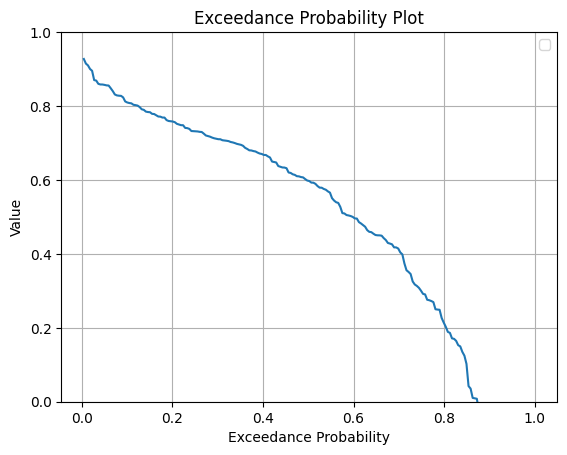

In [89]:

ds = xr.concat(pre_train_simulation_list, dim='mem')
ds = ds.median(dim='mem')

g.exceedance_curve(get_metrics(ds)['nse'].squeeze())

ylim = (0, 1)
plt.ylim(ylim)
plt.legend()




In [ ]:
from hydroml.workflow.evaluation import finetune_evaluate
from hydroml.config.config import load_config
config = load_config('P://work//sho108//hydroml//results_2//toos_qc_validation//241213104442_8206//config.yaml')
config.layers_to_finetune = ['head', 'dynamic_embedding']
finetune_evaluate(config)


